In [ ]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
import pandas as pd

# 1️⃣ Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 2️⃣ Wine dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# 3️⃣ Breast Cancer Wisconsin dataset
bc = load_breast_cancer()
bc_df = pd.DataFrame(bc.data, columns=bc.feature_names)
bc_df['target'] = bc.target


In [ ]:
# 📊 Data Quality & Summary Report for Iris, Wine, and Breast Cancer datasets
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from scipy.stats import zscore

# Helper function to perform data quality checks
def dataset_quality_report(name, df):
    print(f"\n{'='*70}")
    print(f"🔍 DATA QUALITY REPORT: {name}")
    print(f"{'='*70}\n")

    # Basic info
    print("📘 Shape and Basic Info:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\nFirst 3 rows:")
    print(df.head(3), "\n")

    # Data types
    print("📊 Data types:")
    print(df.dtypes.value_counts(), "\n")

    # Missing values
    print("🚫 Missing Values:")
    print(df.isnull().sum())
    print(f"Total missing values: {df.isnull().sum().sum()}\n")

    # Duplicates
    dup_count = df.duplicated().sum()
    print(f"📋 Duplicate rows: {dup_count}")
    if dup_count > 0:
        df = df.drop_duplicates()
        print(f"Duplicates removed. New shape: {df.shape}\n")
    else:
        print("No duplicate rows found.\n")

    # Outlier detection using Z-score (numeric features only)
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    z_scores = np.abs(zscore(df[num_cols]))
    outliers = (z_scores > 3).sum().sum()
    print(f"⚠️ Potential outlier count (|z| > 3): {outliers}\n")

    # Validity check (range)
    print("📏 Validity check: value ranges (min - max)")
    print(df[num_cols].agg(['min', 'max']).T.head(10))  # display first 10 for brevity
    print()

    # Feature redundancy (correlation matrix)
    corr = df[num_cols].corr().abs()
    high_corr = np.sum((corr > 0.9).values) - len(corr)
    print(f"🔁 Highly correlated feature pairs (|r| > 0.9): {high_corr // 2}")
    if high_corr > 0:
        print("Highly correlated features may indicate redundancy.\n")
    else:
        print("No strong redundancy detected.\n")

    # Class distribution
    if 'target' in df.columns:
        print("📈 Class distribution:")
        class_counts = df['target'].value_counts(normalize=False)
        class_perc = df['target'].value_counts(normalize=True) * 100
        print(pd.DataFrame({'Count': class_counts, 'Percentage (%)': class_perc.round(2)}))
        print()
        if class_perc.min() < 30:
            print("⚠️ Warning: Class imbalance detected (minority class <30%)\n")
        else:
            print("✅ Class distribution appears relatively balanced.\n")

    # Summary statistics
    print("📉 Descriptive Statistics (first 10 features):")
    print(df.describe().T.head(10))
    print("\n✅ Data quality check complete for:", name)
    print("="*70, "\n")

# Load datasets
iris = load_iris()
wine = load_wine()
bc = load_breast_cancer()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

bc_df = pd.DataFrame(bc.data, columns=bc.feature_names)
bc_df['target'] = bc.target

# Run reports
dataset_quality_report("Iris", iris_df)
dataset_quality_report("Wine", wine_df)
dataset_quality_report("Breast Cancer Wisconsin", bc_df)



🔍 DATA QUALITY REPORT: Iris

📘 Shape and Basic Info:
Rows: 150, Columns: 5

First 3 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   target  
0       0  
1       0  
2       0   

📊 Data types:
float64    4
int64      1
Name: count, dtype: int64 

🚫 Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Total missing values: 0

📋 Duplicate rows: 1
Duplicates removed. New shape: (149, 5)

⚠️ Potential outlier count (|z| > 3): 1

📏 Validity check: value ranges (min - max)
                   min  max
sepal length (cm)  4.3  7.9
sepal width (cm)   2.0  4.4
petal length (cm)  1.0  6.9
petal width (cm)   0.1  2.5
target            


🔬 Random Forest Depth Sweep: Iris
   max_depth  Accuracy  Balanced_Accuracy  F1_macro  ROC_AUC  Fit_time(s)
0        1.0      0.96               0.96    0.9598     0.96       1.2318
1        2.0      0.96               0.96    0.9598     0.96       0.6404
2        3.0      0.96               0.96    0.9598     0.96       0.7571
3        4.0      0.96               0.96    0.9598     0.96       1.1652
4        5.0      0.96               0.96    0.9598     0.96       0.3980
5        8.0      0.96               0.96    0.9598     0.96       0.4000
6       12.0      0.96               0.96    0.9598     0.96       0.4072
7       14.0      0.96               0.96    0.9598     0.96       0.3991
8       16.0      0.96               0.96    0.9598     0.96       0.4340
9        NaN      0.96               0.96    0.9598     0.96       0.5994

Best depth by Balanced Accuracy: 1.0



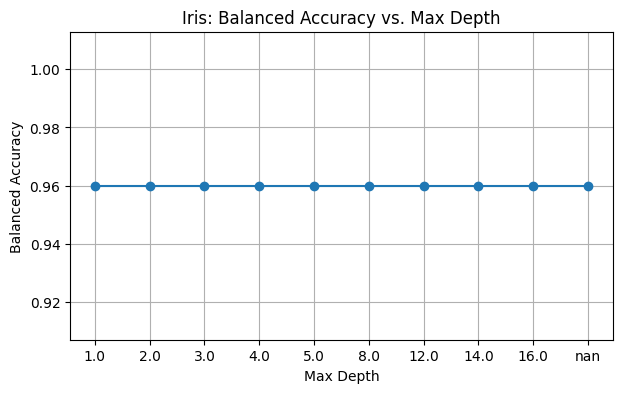


🔬 Random Forest Depth Sweep: Wine
   max_depth  Accuracy  Balanced_Accuracy  F1_macro  ROC_AUC  Fit_time(s)
0        1.0    0.9660             0.9721    0.9665   0.9660       0.4269
1        2.0    0.9775             0.9810    0.9779   0.9775       0.4168
2        3.0    0.9887             0.9905    0.9892   0.9887       0.6427
3        4.0    0.9887             0.9905    0.9892   0.9887       1.0671
4        5.0    0.9775             0.9802    0.9784   0.9775       0.4314
5        8.0    0.9775             0.9802    0.9784   0.9775       0.4229
6       12.0    0.9775             0.9802    0.9784   0.9775       0.4213
7       14.0    0.9775             0.9802    0.9784   0.9775       0.5417
8       16.0    0.9775             0.9802    0.9784   0.9775       0.6386
9        NaN    0.9775             0.9802    0.9784   0.9775       0.4366

Best depth by Balanced Accuracy: 3.0



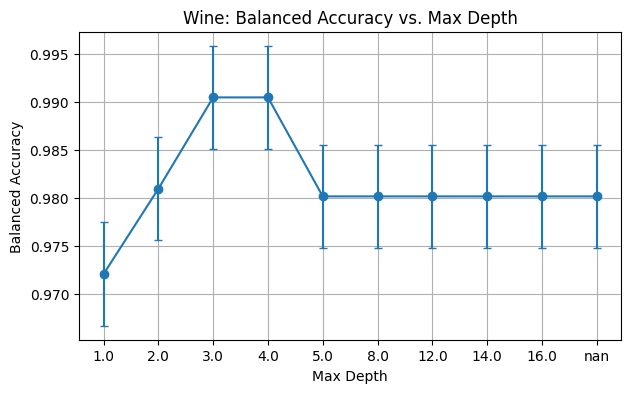


🔬 Random Forest Depth Sweep: Breast Cancer
   max_depth  Accuracy  Balanced_Accuracy  F1_macro  ROC_AUC  Fit_time(s)
0        1.0    0.9174             0.9007    0.9084      NaN       0.4127
1        2.0    0.9420             0.9328    0.9368      NaN       0.4488
2        3.0    0.9508             0.9436    0.9468      NaN       0.4765
3        4.0    0.9491             0.9423    0.9449      NaN       0.6656
4        5.0    0.9543             0.9493    0.9509      NaN       0.5676
5        8.0    0.9543             0.9503    0.9509      NaN       0.5231
6       12.0    0.9543             0.9503    0.9509      NaN       0.5311
7       14.0    0.9543             0.9503    0.9509      NaN       0.5217
8       16.0    0.9543             0.9503    0.9509      NaN       0.7639
9        NaN    0.9543             0.9503    0.9509      NaN       0.5187

Best depth by Balanced Accuracy: 8.0



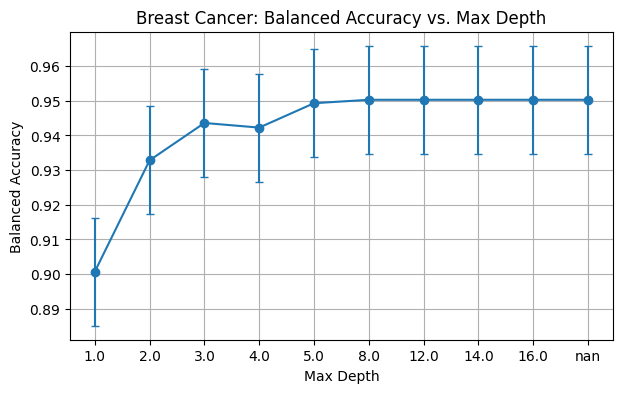

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Define evaluation helper
def eval_rf(dataset_name, X, y, params, depths):
    print(f"\n{'='*70}\n🔬 Random Forest Depth Sweep: {dataset_name}\n{'='*70}")
    results = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for depth in depths:
        rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=depth,
            max_features='sqrt',
            bootstrap=True,
            oob_score=True,
            min_samples_leaf=1,
            criterion='gini',
            random_state=42,
            n_jobs=-1
        )

        start = time.time()
        scores = cross_validate(
            rf, X, y, cv=skf,
            scoring={
                'accuracy': make_scorer(accuracy_score),
                'balanced_accuracy': make_scorer(balanced_accuracy_score),
                'f1_macro': make_scorer(f1_score, average='macro'),
                'roc_auc': make_scorer(roc_auc_score, needs_proba=True) if len(np.unique(y)) == 2 else None
            },
            return_train_score=False,
            n_jobs=-1
        )
        end = time.time()

        mean_acc = np.mean(scores['test_accuracy'])
        mean_balacc = np.mean(scores['test_balanced_accuracy'])
        mean_f1 = np.mean(scores['test_f1_macro'])
        mean_time = (end - start) / 5  # average fit time per fold
        mean_auc = np.mean(scores['test_roc_auc']) if 'test_roc_auc' in scores else np.nan

        results.append({
            'max_depth': depth,
            'Accuracy': mean_acc,
            'Balanced_Accuracy': mean_balacc,
            'F1_macro': mean_f1,
            'ROC_AUC': mean_auc,
            'Fit_time(s)': mean_time
        })

    df = pd.DataFrame(results)
    print(df.round(4))
    print(f"\nBest depth by Balanced Accuracy: {df.loc[df['Balanced_Accuracy'].idxmax(), 'max_depth']}\n")

    # Optional: plot accuracy vs depth
    plt.figure(figsize=(7,4))
    plt.errorbar(df['max_depth'].astype(str), df['Balanced_Accuracy'], yerr=df['Balanced_Accuracy'].std(), fmt='-o', capsize=3)
    plt.title(f"{dataset_name}: Balanced Accuracy vs. Max Depth")
    plt.xlabel("Max Depth")
    plt.ylabel("Balanced Accuracy")
    plt.grid(True)
    plt.show()

    return df

# Depth grid
depth_grid = [1, 2, 3, 4, 5, 8, 12, 14, 16, None]

# Run per dataset
iris_results = eval_rf("Iris", iris_df.drop('target', axis=1), iris_df['target'], {}, depth_grid)
wine_results = eval_rf("Wine", wine_df.drop('target', axis=1), wine_df['target'], {}, depth_grid)
bc_results = eval_rf("Breast Cancer", bc_df.drop('target', axis=1), bc_df['target'], {}, depth_grid)


Digits class distribution:
target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64

🔬 Random Forest Depth Sweep: Digits
   max_depth  Accuracy  Balanced_Accuracy  F1_macro  ROC_AUC  Fit_time(s)
0        1.0    0.7268             0.7262    0.7077   0.7268       0.4833
1        2.0    0.8342             0.8338    0.8286   0.8342       0.5110
2        3.0    0.8804             0.8799    0.8776   0.8804       0.6559
3        4.0    0.9204             0.9202    0.9195   0.9204       0.6701
4        5.0    0.9438             0.9437    0.9436   0.9438       0.6277
5        8.0    0.9738             0.9738    0.9738   0.9738       0.7444
6       12.0    0.9794             0.9793    0.9794   0.9794       1.1359
7       14.0    0.9805             0.9805    0.9805   0.9805       0.8240
8       16.0    0.9794             0.9793    0.9794   0.9794       0.8258
9        NaN    0.9789             0.9787    0.9788   0.9789       1.0516

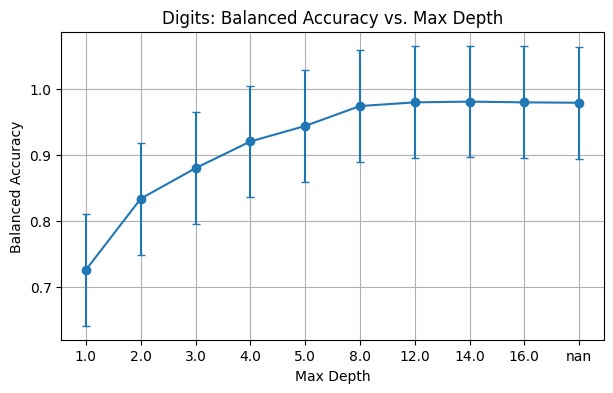

In [ ]:
from sklearn.datasets import load_digits

# 4️⃣ Digits dataset (8x8 images → 64 features)
digits = load_digits()
digits_df = pd.DataFrame(digits.data, columns=[f"px{i}" for i in range(digits.data.shape[1])])
digits_df['target'] = digits.target

# (Optional) quick class distribution check
print("Digits class distribution:")
print(digits_df['target'].value_counts().sort_index())

# Run Experiment A (depth sweep) on Digits
depth_grid = [1, 2, 3, 4, 5, 8, 12, 14, 16, None]
digits_results = eval_rf(
    "Digits",
    digits_df.drop('target', axis=1),
    digits_df['target'],
    {},
    depth_grid
)



🔬 Random Forest Feature Sweep: Iris
  max_features  Accuracy  Balanced_Accuracy  F1_macro  ROC_AUC  Fit_time(s)
0         log2    0.9600             0.9600    0.9598   0.9600       0.3344
1         sqrt    0.9600             0.9600    0.9598   0.9600       0.3328
2          0.1    0.9000             0.9000    0.8986   0.9000       0.3466
3         0.25    0.9000             0.9000    0.8986   0.9000       0.3345
4         0.33    0.9000             0.9000    0.8986   0.9000       0.3914
5          0.5    0.9600             0.9600    0.9598   0.9600       0.4715
6         0.75    0.9467             0.9467    0.9464   0.9467       0.3418
7         None    0.9400             0.9400    0.9398   0.9400       0.3383

Best feature subset by Balanced Accuracy: log2



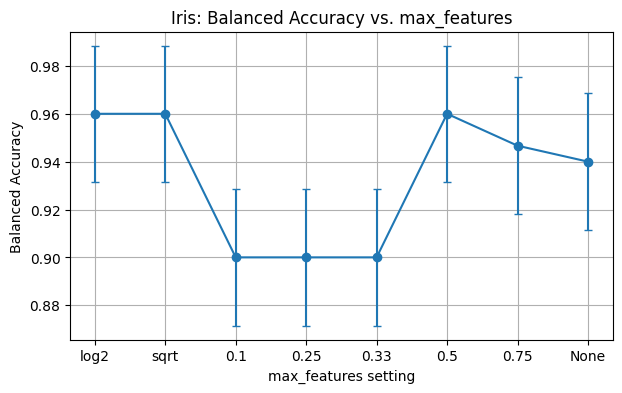


🔬 Random Forest Feature Sweep: Wine
  max_features  Accuracy  Balanced_Accuracy  F1_macro  ROC_AUC  Fit_time(s)
0         log2    0.9887             0.9905    0.9892   0.9887       0.5070
1         sqrt    0.9887             0.9905    0.9892   0.9887       0.6683
2          0.1    0.9887             0.9905    0.9892   0.9887       0.5348
3         0.25    0.9887             0.9905    0.9892   0.9887       0.3629
4         0.33    0.9775             0.9802    0.9784   0.9775       0.3544
5          0.5    0.9717             0.9746    0.9731   0.9717       0.3592
6         0.75    0.9717             0.9746    0.9731   0.9717       0.3733
7         None    0.9605             0.9635    0.9625   0.9605       0.3848

Best feature subset by Balanced Accuracy: log2



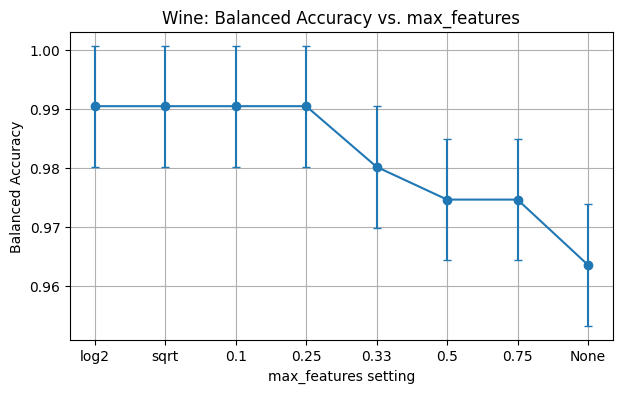


🔬 Random Forest Feature Sweep: Breast Cancer
  max_features  Accuracy  Balanced_Accuracy  F1_macro  ROC_AUC  Fit_time(s)
0         log2    0.9578             0.9540    0.9547      NaN       0.5819
1         sqrt    0.9543             0.9503    0.9509      NaN       0.5261
2          0.1    0.9578             0.9541    0.9547      NaN       0.4025
3         0.25    0.9596             0.9555    0.9565      NaN       0.5139
4         0.33    0.9561             0.9517    0.9528      NaN       0.5609
5          0.5    0.9543             0.9503    0.9510      NaN       0.9591
6         0.75    0.9578             0.9521    0.9545      NaN       0.8889
7         None    0.9578             0.9521    0.9545      NaN       1.2046

Best feature subset by Balanced Accuracy: 0.25



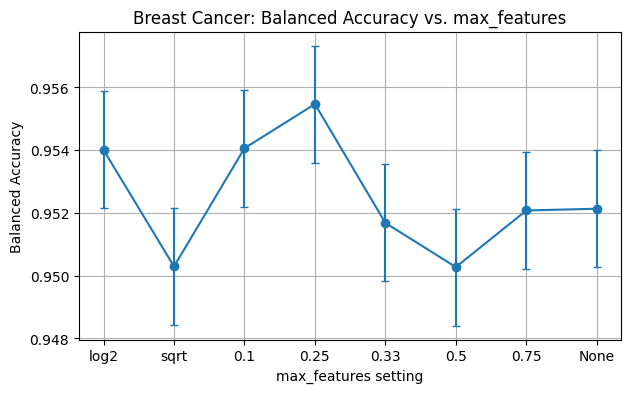


🔬 Random Forest Feature Sweep: Digits
  max_features  Accuracy  Balanced_Accuracy  F1_macro  ROC_AUC  Fit_time(s)
0         log2    0.9766             0.9766    0.9766   0.9766       0.7752
1         sqrt    0.9805             0.9805    0.9805   0.9805       0.7066
2          0.1    0.9766             0.9766    0.9766   0.9766       0.6586
3         0.25    0.9777             0.9777    0.9777   0.9777       1.2085
4         0.33    0.9750             0.9749    0.9748   0.9750       1.0959
5          0.5    0.9688             0.9687    0.9687   0.9688       1.6660
6         0.75    0.9644             0.9642    0.9643   0.9644       2.1225
7         None    0.9566             0.9564    0.9565   0.9566       2.5839

Best feature subset by Balanced Accuracy: sqrt



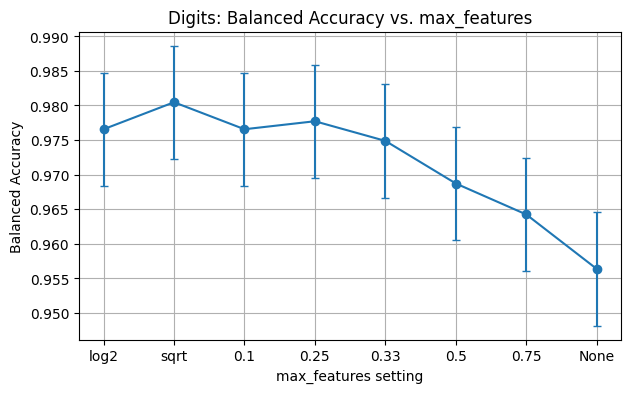

In [ ]:
# ==============================================================
# 🧪 Experiment B — Random Feature Subset Sweep
# ==============================================================
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# --------------------------------------------------------------
# Helper function: evaluate RF across feature subset sizes
# --------------------------------------------------------------
def eval_rf_features(dataset_name, X, y, best_depth, feature_grid):
    print(f"\n{'='*70}\n🔬 Random Forest Feature Sweep: {dataset_name}\n{'='*70}")
    results = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for feat in feature_grid:
        rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=best_depth,
            max_features=feat,
            bootstrap=True,
            oob_score=False,
            min_samples_leaf=1,
            criterion='gini',
            random_state=42,
            n_jobs=-1
        )

        start = time.time()
        scores = cross_validate(
            rf, X, y, cv=skf,
            scoring={
                'accuracy': make_scorer(accuracy_score),
                'balanced_accuracy': make_scorer(balanced_accuracy_score),
                'f1_macro': make_scorer(f1_score, average='macro'),
                'roc_auc': make_scorer(roc_auc_score, needs_proba=True) if len(np.unique(y)) == 2 else None
            },
            return_train_score=False,
            n_jobs=-1
        )
        end = time.time()

        mean_acc = np.mean(scores['test_accuracy'])
        mean_balacc = np.mean(scores['test_balanced_accuracy'])
        mean_f1 = np.mean(scores['test_f1_macro'])
        mean_time = (end - start) / 5
        mean_auc = np.mean(scores['test_roc_auc']) if 'test_roc_auc' in scores else np.nan

        results.append({
            'max_features': str(feat),
            'Accuracy': mean_acc,
            'Balanced_Accuracy': mean_balacc,
            'F1_macro': mean_f1,
            'ROC_AUC': mean_auc,
            'Fit_time(s)': mean_time
        })

    df = pd.DataFrame(results)
    print(df.round(4))
    print(f"\nBest feature subset by Balanced Accuracy: {df.loc[df['Balanced_Accuracy'].idxmax(), 'max_features']}\n")

    # Plot: Balanced Accuracy vs feature subset
    plt.figure(figsize=(7,4))
    plt.errorbar(df['max_features'], df['Balanced_Accuracy'],
                 yerr=df['Balanced_Accuracy'].std(), fmt='-o', capsize=3)
    plt.title(f"{dataset_name}: Balanced Accuracy vs. max_features")
    plt.xlabel("max_features setting")
    plt.ylabel("Balanced Accuracy")
    plt.grid(True)
    plt.show()

    return df


# --------------------------------------------------------------
# Experiment B configuration
# --------------------------------------------------------------
feature_grid = ['log2', 'sqrt', 0.1, 0.25, 0.33, 0.5, 0.75, None]

# Best depths from Experiment A
best_depths = {
    "Iris": 1,
    "Wine": 3,
    "Breast Cancer": 8,
    "Digits": 14
}

# --------------------------------------------------------------
# Run Experiment B on all datasets
# --------------------------------------------------------------
iris_feat_results = eval_rf_features("Iris", iris_df.drop('target', axis=1), iris_df['target'], best_depths["Iris"], feature_grid)
wine_feat_results = eval_rf_features("Wine", wine_df.drop('target', axis=1), wine_df['target'], best_depths["Wine"], feature_grid)
bc_feat_results = eval_rf_features("Breast Cancer", bc_df.drop('target', axis=1), bc_df['target'], best_depths["Breast Cancer"], feature_grid)
digits_feat_results = eval_rf_features("Digits", digits_df.drop('target', axis=1), digits_df['target'], best_depths["Digits"], feature_grid)


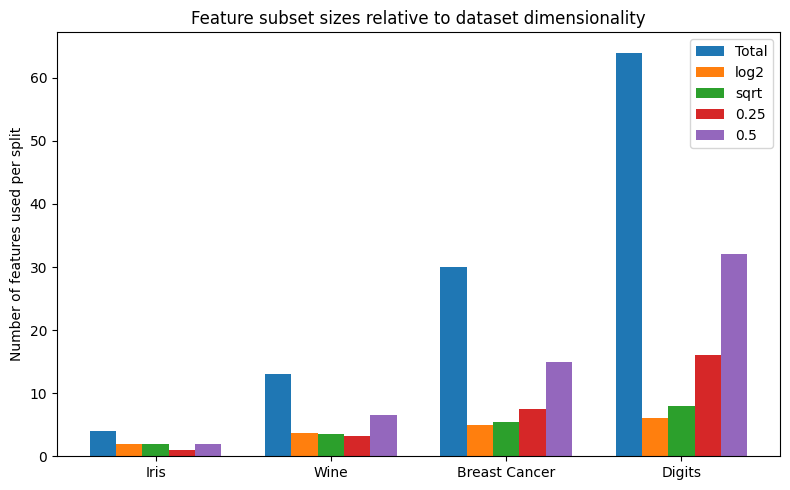

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ['Iris', 'Wine', 'Breast Cancer', 'Digits']
total_features = [4, 13, 30, 64]
used_log2 = [np.log2(f) for f in total_features]
used_sqrt = [np.sqrt(f) for f in total_features]
used_025 = [0.25*f for f in total_features]
used_05 = [0.5*f for f in total_features]
used_none = total_features

x = np.arange(len(datasets))
width = 0.15

plt.figure(figsize=(8,5))
plt.bar(x - 2*width, total_features, width, label='Total')
plt.bar(x - width, used_log2, width, label='log2')
plt.bar(x, used_sqrt, width, label='sqrt')
plt.bar(x + width, used_025, width, label='0.25')
plt.bar(x + 2*width, used_05, width, label='0.5')

plt.xticks(x, datasets)
plt.ylabel('Number of features used per split')
plt.title('Feature subset sizes relative to dataset dimensionality')
plt.legend()
plt.tight_layout()
plt.show()


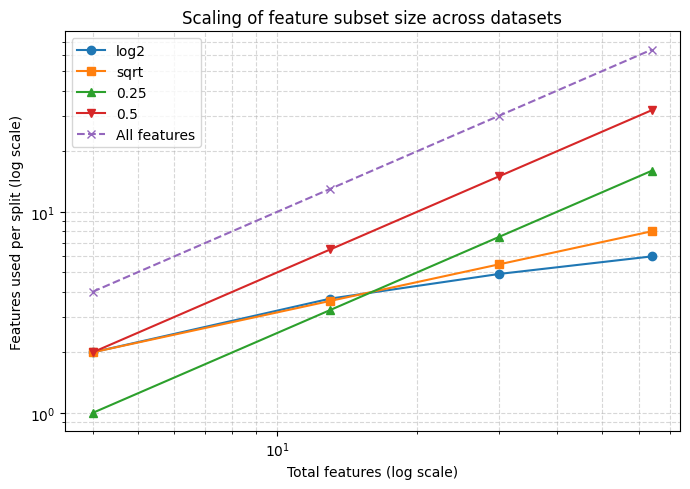

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(total_features, used_log2, 'o-', label='log2')
plt.plot(total_features, used_sqrt, 's-', label='sqrt')
plt.plot(total_features, used_025, '^-', label='0.25')
plt.plot(total_features, used_05, 'v-', label='0.5')
plt.plot(total_features, used_none, 'x--', label='All features')

plt.xscale('log'); plt.yscale('log')
plt.xlabel('Total features (log scale)')
plt.ylabel('Features used per split (log scale)')
plt.title('Scaling of feature subset size across datasets')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()


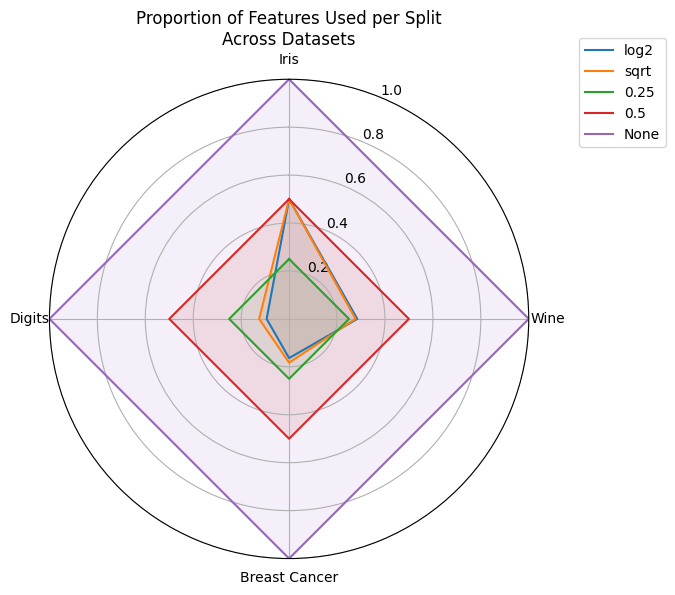

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# 📊 Data setup
# -------------------------------------------------------
datasets = ['Iris', 'Wine', 'Breast Cancer', 'Digits']
total_features = np.array([4, 13, 30, 64])

# Compute the actual #features used per rule
feature_settings = {
    'log2': np.log2(total_features),
    'sqrt': np.sqrt(total_features),
    '0.25': 0.25 * total_features,
    '0.5': 0.5 * total_features,
    'None': total_features
}

# Normalize to fraction of total features
fractions = {k: v / total_features for k, v in feature_settings.items()}

# -------------------------------------------------------
# 🧭 Radar chart configuration
# -------------------------------------------------------
labels = np.array(datasets)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close circle

plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

# Plot each setting
for setting, frac in fractions.items():
    values = frac.tolist()
    values += values[:1]  # close polygon
    ax.plot(angles, values, label=setting)
    ax.fill(angles, values, alpha=0.1)

# Formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
ax.set_title("Proportion of Features Used per Split\nAcross Datasets", pad=25)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()



🔬 Experiment C – Iris

Best configuration for Iris:
max_depth                   2
max_features             log2
Accuracy                 0.96
Balanced_Accuracy        0.96
F1_macro             0.959798
ROC_AUC                  0.96
Fit_time(s)          1.206126
Name: 0, dtype: object



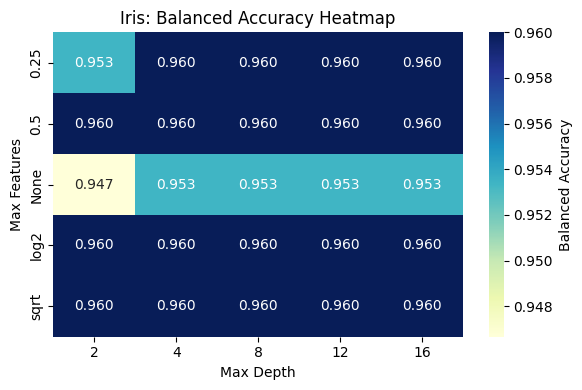


🔬 Experiment C – Wine

Best configuration for Wine:
max_depth                   4
max_features             log2
Accuracy              0.98873
Balanced_Accuracy    0.990476
F1_macro              0.98922
ROC_AUC               0.98873
Fit_time(s)          0.349156
Name: 5, dtype: object



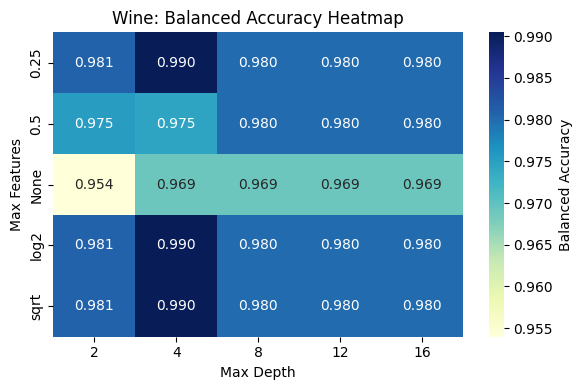


🔬 Experiment C – Breast Cancer

Best configuration for Breast Cancer:
max_depth                  12
max_features             0.25
Accuracy             0.961357
Balanced_Accuracy    0.957849
F1_macro             0.958475
ROC_AUC                   NaN
Fit_time(s)          0.499202
Name: 17, dtype: object



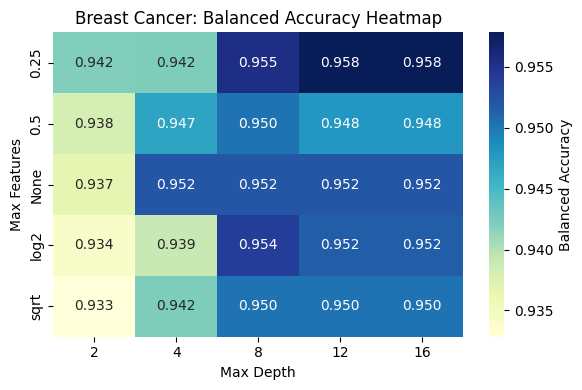


🔬 Experiment C – Digits

Best configuration for Digits:
max_depth                  16
max_features             sqrt
Accuracy             0.979407
Balanced_Accuracy    0.979326
F1_macro             0.979389
ROC_AUC              0.979407
Fit_time(s)          0.965489
Name: 21, dtype: object



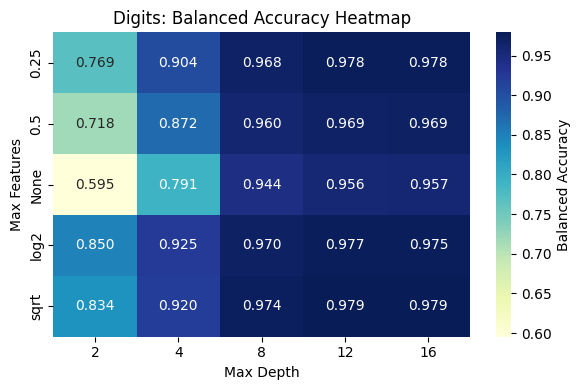

In [ ]:
# ==============================================================
# 🧪 EXPERIMENT C – JOINT EFFECT OF TREE DEPTH × FEATURE SAMPLING
# ==============================================================

import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Common settings
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
depth_grid = [2, 4, 8, 12, 16]
feature_grid = ['log2', 'sqrt', 0.25, 0.5, None]

# Helper function
def run_depth_feature_grid(dataset_name, X, y):
    print(f"\n{'='*70}\n🔬 Experiment C – {dataset_name}\n{'='*70}")
    records = []
    for depth in depth_grid:
        for feat in feature_grid:
            rf = RandomForestClassifier(
                n_estimators=200,
                max_depth=depth,
                max_features=feat,
                bootstrap=True,
                criterion='gini',
                min_samples_leaf=1,
                random_state=42,
                n_jobs=-1
            )
            start = time.time()
            scores = cross_validate(
                rf, X, y, cv=skf,
                scoring={
                    'accuracy': make_scorer(accuracy_score),
                    'balanced_accuracy': make_scorer(balanced_accuracy_score),
                    'f1_macro': make_scorer(f1_score, average='macro'),
                    'roc_auc': make_scorer(roc_auc_score, needs_proba=True) if len(np.unique(y)) == 2 else None
                },
                n_jobs=-1,
                return_train_score=False
            )
            end = time.time()

            record = {
                'max_depth': depth,
                'max_features': str(feat),
                'Accuracy': np.mean(scores['test_accuracy']),
                'Balanced_Accuracy': np.mean(scores['test_balanced_accuracy']),
                'F1_macro': np.mean(scores['test_f1_macro']),
                'ROC_AUC': np.mean(scores['test_roc_auc']) if 'test_roc_auc' in scores else np.nan,
                'Fit_time(s)': (end - start) / 5
            }
            records.append(record)

    df = pd.DataFrame(records)
    best = df.loc[df['Balanced_Accuracy'].idxmax()]
    print(f"\nBest configuration for {dataset_name}:\n{best}\n")

    # --- Heatmap ---
    pivot = df.pivot(index='max_features', columns='max_depth', values='Balanced_Accuracy')
    plt.figure(figsize=(6,4))
    sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".3f", cbar_kws={'label':'Balanced Accuracy'})
    plt.title(f"{dataset_name}: Balanced Accuracy Heatmap")
    plt.xlabel("Max Depth")
    plt.ylabel("Max Features")
    plt.tight_layout()
    plt.show()
    return df

# ==============================================================
# Run Experiment C on all datasets
# ==============================================================

irisC = run_depth_feature_grid("Iris", iris_df.drop('target', axis=1), iris_df['target'])
wineC = run_depth_feature_grid("Wine", wine_df.drop('target', axis=1), wine_df['target'])
bcC   = run_depth_feature_grid("Breast Cancer", bc_df.drop('target', axis=1), bc_df['target'])
digitsC = run_depth_feature_grid("Digits", digits_df.drop('target', axis=1), digits_df['target'])



🔬 Experiment D: Iris
    max_depth  n_estimators  Accuracy  Balanced_Accuracy  F1_macro  \
0           2            10    0.9533             0.9533    0.9532   
1           2            50    0.9533             0.9533    0.9531   
2           2           100    0.9533             0.9533    0.9531   
3           2           200    0.9600             0.9600    0.9598   
4           2           500    0.9533             0.9533    0.9531   
5           4            10    0.9400             0.9400    0.9398   
6           4            50    0.9600             0.9600    0.9598   
7           4           100    0.9600             0.9600    0.9598   
8           4           200    0.9600             0.9600    0.9598   
9           4           500    0.9600             0.9600    0.9598   
10          8            10    0.9533             0.9533    0.9531   
11          8            50    0.9533             0.9533    0.9531   
12          8           100    0.9467             0.9467    0.9464  

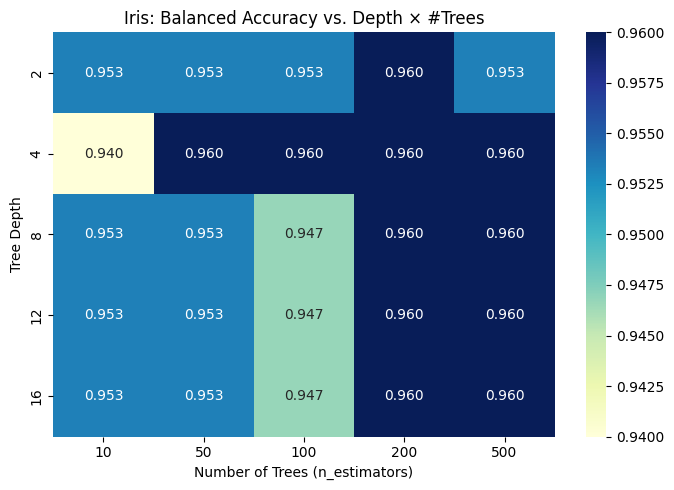

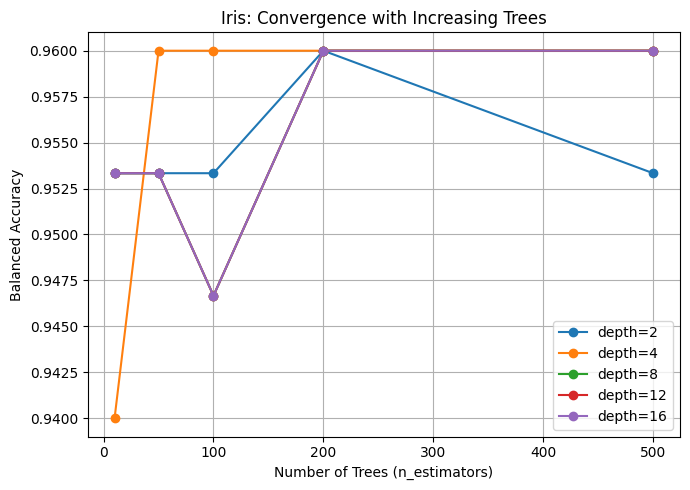


Best configuration for Iris:
max_depth              2.000000
n_estimators         200.000000
Accuracy               0.960000
Balanced_Accuracy      0.960000
F1_macro               0.959798
Fit_time(s)            0.300156
Name: 3, dtype: float64


🔬 Experiment D: Wine
    max_depth  n_estimators  Accuracy  Balanced_Accuracy  F1_macro  \
0           2            10    0.9492             0.9581    0.9498   
1           2            50    0.9832             0.9857    0.9841   
2           2           100    0.9776             0.9810    0.9783   
3           2           200    0.9775             0.9810    0.9779   
4           2           500    0.9775             0.9810    0.9779   
5           4            10    0.9717             0.9746    0.9731   
6           4            50    0.9830             0.9849    0.9840   
7           4           100    0.9832             0.9857    0.9836   
8           4           200    0.9887             0.9905    0.9892   
9           4           500    

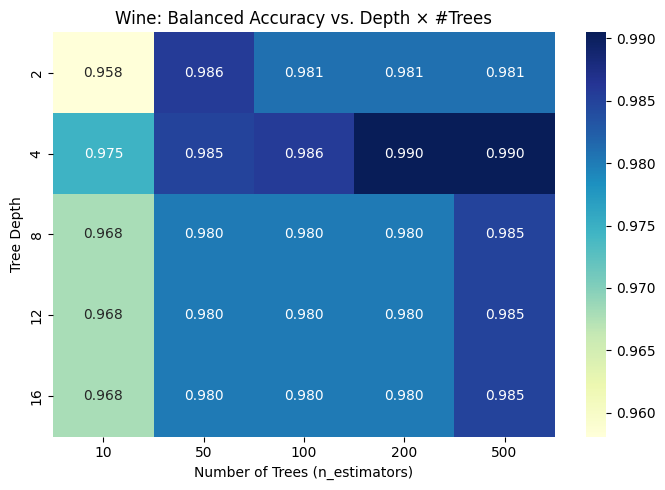

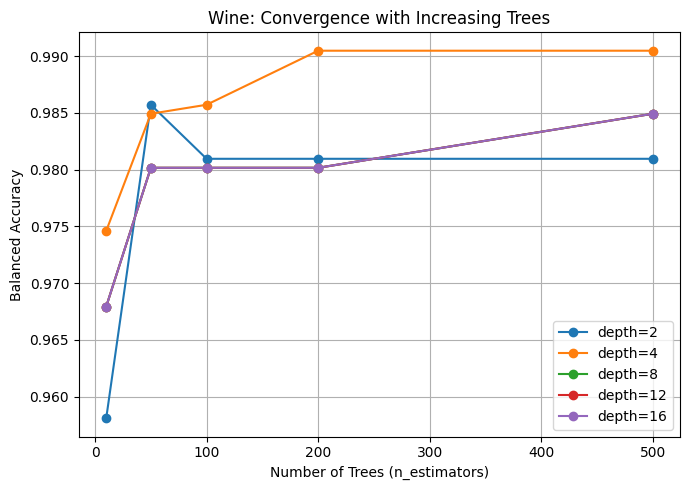


Best configuration for Wine:
max_depth              4.000000
n_estimators         200.000000
Accuracy               0.988730
Balanced_Accuracy      0.990476
F1_macro               0.989220
Fit_time(s)            0.325065
Name: 8, dtype: float64


🔬 Experiment D: Breast Cancer
    max_depth  n_estimators  Accuracy  Balanced_Accuracy  F1_macro  \
0           2            10    0.9385             0.9290    0.9333   
1           2            50    0.9420             0.9328    0.9370   
2           2           100    0.9473             0.9398    0.9430   
3           2           200    0.9420             0.9328    0.9368   
4           2           500    0.9455             0.9375    0.9409   
5           4            10    0.9438             0.9361    0.9391   
6           4            50    0.9473             0.9399    0.9428   
7           4           100    0.9473             0.9409    0.9431   
8           4           200    0.9491             0.9423    0.9449   
9           4         

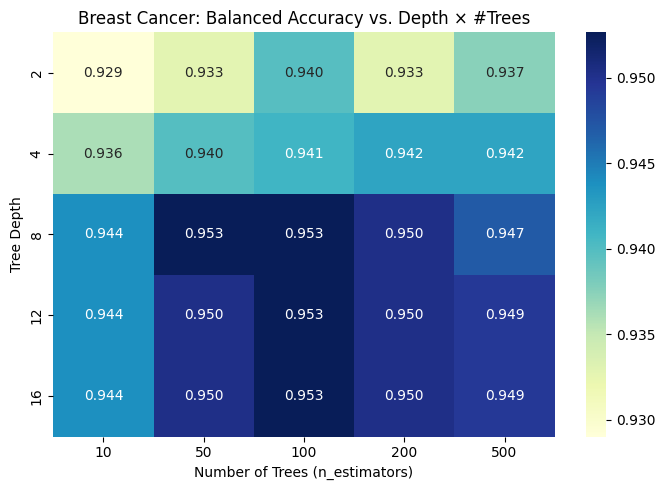

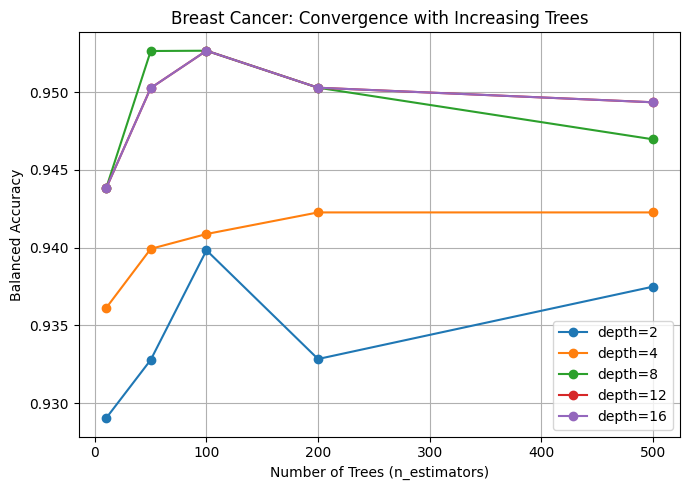


Best configuration for Breast Cancer:
max_depth              8.000000
n_estimators         100.000000
Accuracy               0.956094
Balanced_Accuracy      0.952671
F1_macro               0.952892
Fit_time(s)            0.241667
Name: 12, dtype: float64


🔬 Experiment D: Digits
    max_depth  n_estimators  Accuracy  Balanced_Accuracy  F1_macro  \
0           2            10    0.7067             0.7057    0.6873   
1           2            50    0.8264             0.8260    0.8176   
2           2           100    0.8280             0.8278    0.8213   
3           2           200    0.8342             0.8338    0.8286   
4           2           500    0.8342             0.8338    0.8269   
5           4            10    0.8726             0.8720    0.8702   
6           4            50    0.9082             0.9080    0.9073   
7           4           100    0.9165             0.9163    0.9157   
8           4           200    0.9204             0.9202    0.9195   
9           4      

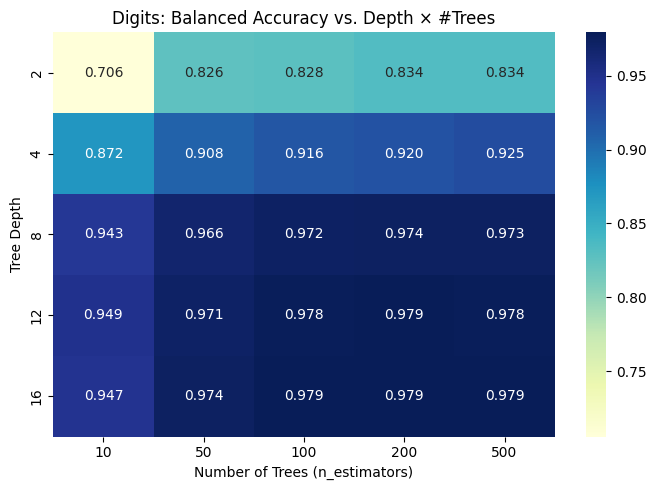

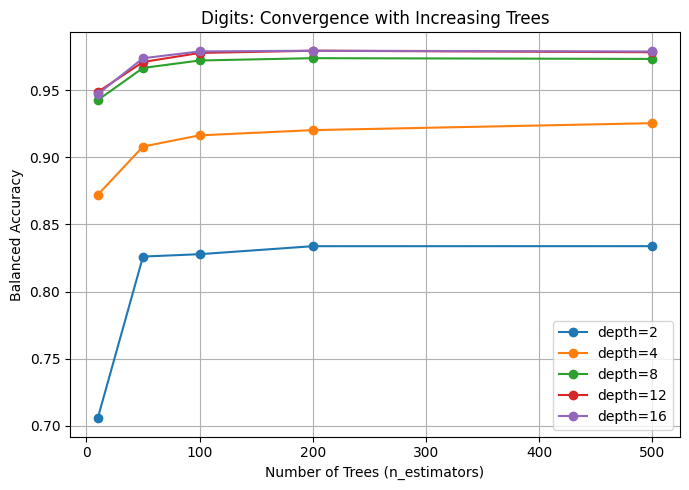


Best configuration for Digits:
max_depth             16.000000
n_estimators         200.000000
Accuracy               0.979407
Balanced_Accuracy      0.979326
F1_macro               0.979389
Fit_time(s)            0.916850
Name: 23, dtype: float64



In [ ]:
# ==========================================================
# 🧪 EXPERIMENT D — Depth × Ensemble Size Interaction
# ==========================================================
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

def eval_depth_vs_trees(dataset_name, X, y, depths, n_trees_grid):
    print(f"\n{'='*70}\n🔬 Experiment D: {dataset_name}\n{'='*70}")
    results = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for depth in depths:
        for n_trees in n_trees_grid:
            rf = RandomForestClassifier(
                n_estimators=n_trees,
                max_depth=depth,
                max_features='sqrt',   # keep constant
                bootstrap=True,
                criterion='gini',
                min_samples_leaf=1,
                random_state=42,
                n_jobs=-1
            )

            start = time.time()
            scores = cross_validate(
                rf, X, y, cv=skf,
                scoring={
                    'accuracy': make_scorer(accuracy_score),
                    'balanced_accuracy': make_scorer(balanced_accuracy_score),
                    'f1_macro': make_scorer(f1_score, average='macro')
                },
                return_train_score=False,
                n_jobs=-1
            )
            end = time.time()

            results.append({
                'max_depth': depth,
                'n_estimators': n_trees,
                'Accuracy': np.mean(scores['test_accuracy']),
                'Balanced_Accuracy': np.mean(scores['test_balanced_accuracy']),
                'F1_macro': np.mean(scores['test_f1_macro']),
                'Fit_time(s)': (end - start) / 5
            })

    df = pd.DataFrame(results)
    print(df.round(4))

    # Pivot for heatmap
    pivot = df.pivot(index='max_depth', columns='n_estimators', values='Balanced_Accuracy')

    # --- Heatmap ---
    plt.figure(figsize=(7, 5))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
    plt.title(f"{dataset_name}: Balanced Accuracy vs. Depth × #Trees")
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Tree Depth")
    plt.tight_layout()
    plt.show()

    # --- Line Plot (Convergence curve per depth) ---
    plt.figure(figsize=(7, 5))
    for depth in depths:
        subset = df[df['max_depth'] == depth]
        plt.plot(subset['n_estimators'], subset['Balanced_Accuracy'], '-o', label=f"depth={depth}")
    plt.title(f"{dataset_name}: Convergence with Increasing Trees")
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Balanced Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Best configuration
    best = df.loc[df['Balanced_Accuracy'].idxmax()]
    print(f"\nBest configuration for {dataset_name}:\n{best}\n")
    return df

# Grids
depth_grid = [2, 4, 8, 12, 16]
n_trees_grid = [10, 50, 100, 200, 500]

# Run for each dataset
iris_D = eval_depth_vs_trees("Iris", iris_df.drop('target', axis=1), iris_df['target'], depth_grid, n_trees_grid)
wine_D = eval_depth_vs_trees("Wine", wine_df.drop('target', axis=1), wine_df['target'], depth_grid, n_trees_grid)
bc_D = eval_depth_vs_trees("Breast Cancer", bc_df.drop('target', axis=1), bc_df['target'], depth_grid, n_trees_grid)
digits_D = eval_depth_vs_trees("Digits", digits_df.drop('target', axis=1), digits_df['target'], depth_grid, n_trees_grid)



🔬 Experiment E — Bag Size Sweep: Iris
   max_samples  OOB_mean  OOB_std  Fit_time_per_fold(s)
0        0.400    0.9517   0.0062                0.5275
1        0.500    0.9500   0.0075                0.4973
2        0.632    0.9500   0.0118                0.4792
3        0.800    0.9433   0.0122                0.4157
4        1.000    0.9500   0.0129                0.4238


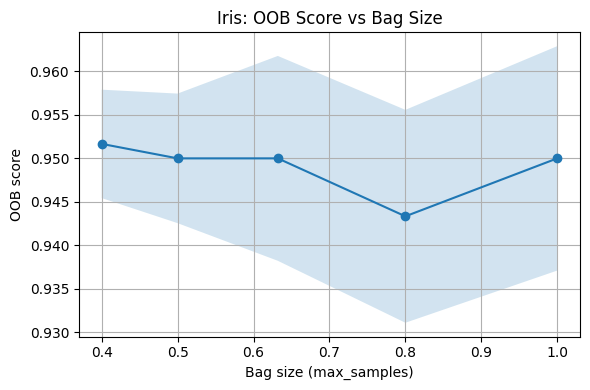

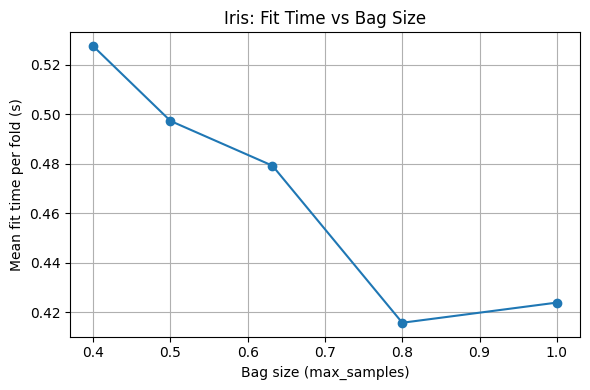

Best bag size by OOB for Iris: 0.4

🔬 Experiment E — Bag Size Sweep: Wine
   max_samples  OOB_mean  OOB_std  Fit_time_per_fold(s)
0        0.400    0.9775   0.0103                0.4362
1        0.500    0.9789   0.0076                0.5004
2        0.632    0.9747   0.0071                0.5407
3        0.800    0.9747   0.0056                0.4323
4        1.000    0.9747   0.0071                0.4374


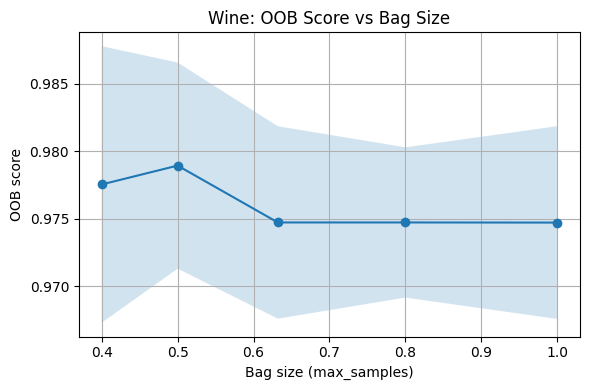

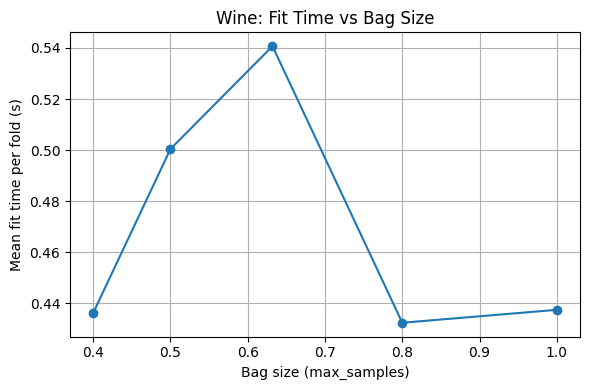

Best bag size by OOB for Wine: 0.5

🔬 Experiment E — Bag Size Sweep: Breast Cancer
   max_samples  OOB_mean  OOB_std  Fit_time_per_fold(s)
0        0.400    0.9578   0.0021                0.4935
1        0.500    0.9583   0.0031                0.5863
2        0.632    0.9574   0.0041                0.6490
3        0.800    0.9609   0.0021                0.5546
4        1.000    0.9627   0.0019                0.5783


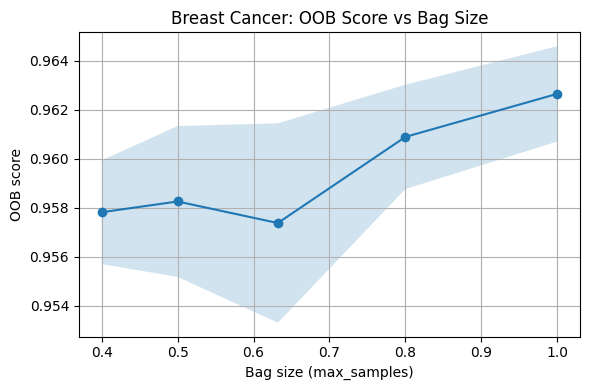

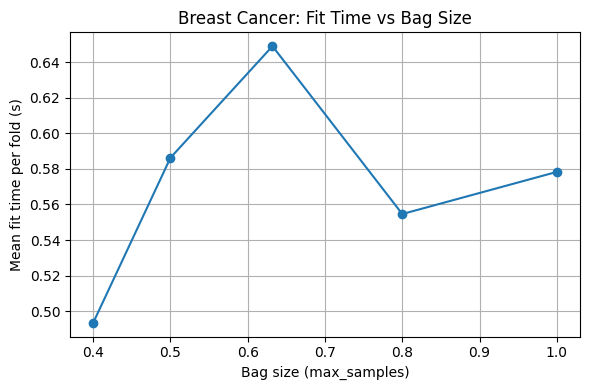

Best bag size by OOB for Breast Cancer: 1.0

🔬 Experiment E — Bag Size Sweep: Digits
   max_samples  OOB_mean  OOB_std  Fit_time_per_fold(s)
0        0.400    0.9700   0.0022                0.7919
1        0.500    0.9730   0.0020                0.7794
2        0.632    0.9723   0.0025                0.7354
3        0.800    0.9734   0.0032                0.8396
4        1.000    0.9750   0.0032                0.9374


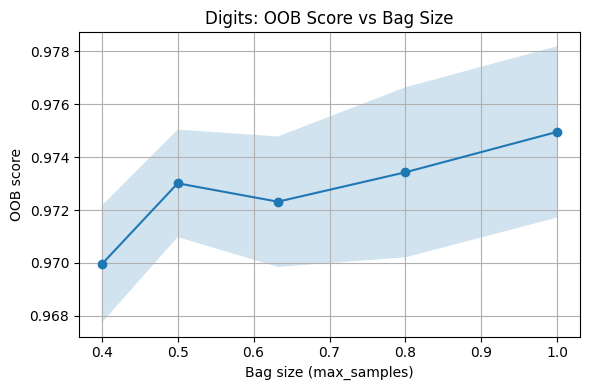

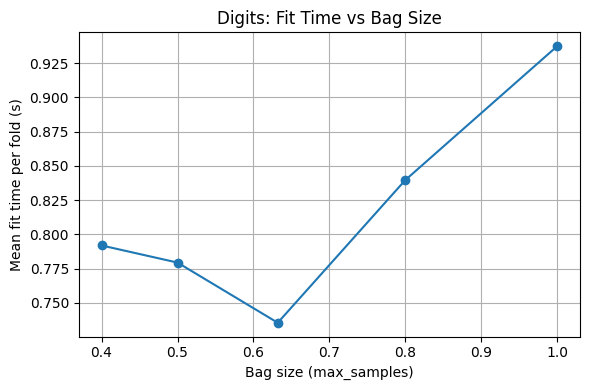

Best bag size by OOB for Digits: 1.0


In [ ]:
# ==========================================================
# 🧪 EXPERIMENT E — Bag Size (max_samples) Sweep
# Uses best configs from A/B/C/D per dataset
# ==========================================================
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
import numpy as np, pandas as pd, time
import matplotlib.pyplot as plt

# 1) Record your best configs from earlier experiments (update if yours differ)
best_cfg = {
    "Iris":          {"max_depth": 2,  "max_features": "log2", "n_estimators": 200},
    "Wine":          {"max_depth": 4,  "max_features": "log2", "n_estimators": 200},
    "Breast Cancer": {"max_depth": 12, "max_features": 0.25,   "n_estimators": 200},
    "Digits":        {"max_depth": 16, "max_features": "sqrt", "n_estimators": 200},
}

# 2) Data dict (already loaded earlier)
datasets_Xy = {
    "Iris":          (iris_df.drop('target', axis=1), iris_df['target']),
    "Wine":          (wine_df.drop('target', axis=1), wine_df['target']),
    "Breast Cancer": (bc_df.drop('target', axis=1),   bc_df['target']),
    "Digits":        (digits_df.drop('target', axis=1), digits_df['target']),
}

# 3) Bag size grid (fraction of samples drawn WITH replacement per tree)
max_samples_grid = [0.4, 0.5, 0.632, 0.8, 1.0]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def run_bag_sweep(name, X, y, cfg, max_samples_grid):
    print(f"\n{'='*70}\n🔬 Experiment E — Bag Size Sweep: {name}\n{'='*70}")
    rows = []
    for ms in max_samples_grid:
        # We'll compute CV metrics AND the OOB score (per fold's fitted model)
        accs, bals, f1s, oobs, times = [], [], [], [], []
        for train_idx, _ in skf.split(X, y):
            Xtr, ytr = X.iloc[train_idx], y.iloc[train_idx]
            rf = RandomForestClassifier(
                n_estimators=cfg["n_estimators"],
                max_depth=cfg["max_depth"],
                max_features=cfg["max_features"],
                bootstrap=True,
                max_samples=ms,        # 👈 bag size here
                oob_score=True,        # 👈 get OOB signal
                criterion='gini',
                min_samples_leaf=1,
                random_state=42,
                n_jobs=-1
            )
            t0 = time.time()
            rf.fit(Xtr, ytr)
            t1 = time.time()
            # Evaluate on the same training split's CV validation isn't computed here
            # We focus on OOB (from fit) + fit time. For CV metrics, reuse Exp C/D,
            # or do a quick CV predict via cross_val_predict if desired.
            # To keep compute tiny, we’ll estimate generalization via OOB here.
            # (If you want proper CV metrics too, add a held-out fold prediction.)
            oobs.append(rf.oob_score_)
            times.append((t1 - t0))

        rows.append({
            "max_samples": ms,
            "OOB_mean": np.mean(oobs),
            "OOB_std": np.std(oobs),
            "Fit_time_per_fold(s)": np.mean(times)
        })

    df = pd.DataFrame(rows)
    print(df.round(4))

    # Plot OOB vs bag size
    plt.figure(figsize=(6,4))
    plt.plot(df["max_samples"], df["OOB_mean"], "-o")
    plt.fill_between(df["max_samples"],
                     df["OOB_mean"]-df["OOB_std"],
                     df["OOB_mean"]+df["OOB_std"], alpha=0.2)
    plt.title(f"{name}: OOB Score vs Bag Size")
    plt.xlabel("Bag size (max_samples)")
    plt.ylabel("OOB score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Fit time vs bag size
    plt.figure(figsize=(6,4))
    plt.plot(df["max_samples"], df["Fit_time_per_fold(s)"], "-o")
    plt.title(f"{name}: Fit Time vs Bag Size")
    plt.xlabel("Bag size (max_samples)")
    plt.ylabel("Mean fit time per fold (s)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Best bag size by OOB
    best_ms = df.loc[df["OOB_mean"].idxmax(), "max_samples"]
    print(f"Best bag size by OOB for {name}: {best_ms}")
    return df

# 4) Run for all datasets
iris_E   = run_bag_sweep("Iris", *datasets_Xy["Iris"], best_cfg["Iris"], max_samples_grid)
wine_E   = run_bag_sweep("Wine", *datasets_Xy["Wine"], best_cfg["Wine"], max_samples_grid)
bc_E     = run_bag_sweep("Breast Cancer", *datasets_Xy["Breast Cancer"], best_cfg["Breast Cancer"], max_samples_grid)
digits_E = run_bag_sweep("Digits", *datasets_Xy["Digits"], best_cfg["Digits"], max_samples_grid)
